# Section IV. DYNAMICS AND CONTROL
    
# Chapter 13. What are Dynamics and Control?

The purpose of dynamics is to study how time and force act on a
mechanism, while the purpose of controls is to study how a system should
respond to errors and disturbances. At this point, we have described how
to reason about the positions of robots and how to generate continuous
paths. But actually executing those paths requires us to think much more
carefully about the physics of robot mechanisms, and the role of time
and velocity. Even the strongest robots cannot instantaneously change
velocities, and driving and flying robots cannot move sideways.

It is through the use of control that an industrial robot can move to a
position with sub-millimeter accuracy, and an aircraft can fly for
thousands of kilometers but land on an airstrip a few meters wide. It is
also a means for understanding locomotion and reflexes in the biological
sensorimotor system. It is important to note that both dynamics and
control are deep fields of study that are more than one hundred years
old, and yet they are still undergoing significant change! Classical
approaches rely heavily on mathematical analysis, while more modern
approaches to control rely on computation as a key tool. Due to this
depth, to master these fields requires years of specialized
investigation, and this part of the book can only survey the main points
as they relate to robotics. We will see some of both the historical and
modern approaches in the next few chapters.

In the topic of dynamics we will cover 1) basic terminology of dynamical
systems, 2) simple dynamical systems from physics, 3) the dynamics of
articulated robots, and 4) contact mechanics. In controls will describe
methods for 1) analyzing stability of controlled dynamical systems, 2)
controlling articulated robots with high accuracy, and 3) generating
feasible and optimal control strategies.

Basic terminology
-----------------

A *dynamical system* is one in which the state of the system changes
continuously over time. The notion of *state* is similar to that of a
configuration, although it can also include terms like joint velocities.
In this section, we let $x \in \mathbb{R}^n$ be the quantity defining
the *state* of the system. Robots are able to apply forces and otherwise
*alter the rate of change of the state* using their actuators. We define
the *control* (aka control input) as $u \in \mathbb{R}^m$, where $m$ is
the number of independently chosen variables.

For example, in a 6-joint industrial robot, the state of the robot is
typically considered as $x=(q,v) \in \mathbb{R}^{12}$. The inclusion of
a velocity term allows us to express how the robot's momentum affects
its future movement, and how joint forces affect velocities. The control
variable $u$ can take on many forms, depending on how the controller is
designed. For example, if the controller takes desired joint velocities
as inputs, the control variable is $u=(v_{d1},\ldots,v_{d6})$ where
$v_{di}$ indicates the desired velocity of joint $i$. On the other hand,
if it takes joint torques as inputs, the control variable is
$u=(\tau_{1},\ldots,\tau_{6})$.

The standard terminology for modeling a dynamical system is an
expression relating the state and control to the derivative of the
state. In the case that we do not have the ability to control a system,
we have an *uncontrolled dynamics equation* of the form
\begin{equation}
\dot{x} = f(x).
\label{eq:UncontrolledDynamicEquation}
\end{equation}

If the system can indeed be
controlled by a control $u$, we have a *controlled dynamics equation*:
\begin{equation}
\dot{x} = f(x,u)
\label{eq:DynamicEquation}
\end{equation}

where $x$ is the state, $u$ is the control,
and $\dot{x}$ is the time derivative of the state $\frac{dx}{dt}$. The function $f$ is
known as the dynamics of the system. These equations are also known as
the *equations of motion*.

It is important to note that $x$ and $u$ are actually *functions of
time*. If we need to explicitly represent the dependence on time we
shall write $x(t)$ and $u(t)$. Hence, the dot notation is simply the
time derivative $\dot{x} = \frac{d}{dt}x$. (Or more explicitly,
$\dot{x}(t) = \frac{d}{dt}x(t)$.) Also note that from this chapter
onward, all variables except for time will be vector quantities unless
stated otherwise.

It should be noted that we have introduced the terms "dynamical" and
"dynamics" which should be taken to be *almost* synonyms. Being quite
pedantic, we will say something is dynamic when it changes over time,
while something is dynamical if it *regards* dynamics. When we say
"dynamical system" it means that the system regards a dynamic quantity
(the state) but the system itself is not changing over time. We shall
also sometimes say "dynamic equation" which is a synonym with "dynamics
equation" and is chosen according to author's preference. But why don't we
call it a "dynamical equation"? Let's just move on, and let the grammar
Nazis squabble over terminology\...

### Open-loop and closed-loop control

Given a dynamics function $f$, our job is to decide upon the control $u$
in order to accomplish some desired task. There are two primary types of
controls: 1) *open-loop* control, in which case $u \equiv u(t)$ only
depends on time, and 2) closed-loop control, in which case
$u \equiv u(x)$ depends on state. (It may also depend on time, in which
case we write $u \equiv u(x,t)$.)

The significance of closed-loop control is that the control function can
"observe" the state of the system and change accordingly in order to
achieve the desired task. The control function in this case is also
known as a *control policy*. This allows a robot to adapt to
disturbances to achieve high accuracy and to prevent veering off-course.
However, for purposes of planning, it will often be easier to compute an
open-loop trajectory. Later, we shall see how to convert an open loop
plan into a closed-loop one via the approach of model predictive
control.

### Discrete-time systems

In many cases it is convenient to talk about *discrete-time* systems in
which time is no longer a continuous variable but a discrete quantity
$t=0,1,2,\ldots$, and the dynamics are specified in the form
\begin{equation}
x_{t+1} = f(x_t,u_t).
\label{eq:DiscreteTimeDynamicEquation}
\end{equation}

Here, the control is allowed to
change only at discrete points in time, and the state is only observed
at discrete points in time. This more accurately characterizes digital
control systems which operate on a given clock frequency. However, in
many situations the *control frequency* is so high that the
continuous-time
model ($\ref{eq:DynamicEquation}$) is appropriate.

### Converting higher-order dynamic systems into first-order systems

Often, we shall see systems of the form

\begin{equation}
\ddot{x} = f(x,\dot{x},u)
\label{eq:SecondOrderSystem}
\end{equation}

which relate state and controls to *accelerations* of the state $\ddot{x} = \frac{d^2 x}{dt^2}$.  This does not seem to satisfy our definition of a dynamic system, since we've never seen a double time derivative.  However, we can employ a *stacking trick* to define a first order system, but of twice the dimension.  Let us define the stacked state vector

$$y \equiv \begin{bmatrix} x \\ \dot{x} \end{bmatrix}.$$

Then, we can rewrite ($\ref{eq:SecondOrderSystem}$) in a first-order form as:

$$\dot{y} = g(y,u)$$

where $g(y,u) \equiv f(x,\dot{x},u)$ simply "unstacks" the state and velocity from $y$.  Now all of the machinery of first-order systems can be applied to the second order system.  This can also be done for dynamic systems of order 3 and higher, wherein all derivatives are stacked into a single vector.

(Note that to define an initial state $y_0$, we will need to specify the initial position $x_0$ as well as the velocity $\dot{x}_0$.)

ODE integration
--------------------------

Consider a controlled, continuous time dynamic system $\dot{x}= f(x,u)$, with $x\in \mathbb{R}^n$
and $u\in \mathbb{R}^m$.  Suppose we are given an _initial state_ $x_0$ encountered at $t=0$, and a control $u(x,t)$ defined for $t \geq 0$.  Solving for the state trajectory requires solving an **initial value problem** of an **ordinary differential equation** (ODE):

$$\text{Find }x(t) \text{ for } t > 0 \text{ subject to }\dot{x}(t) = g(x(t),t) \text{ and } x(0)=x_0. $$

where $g(x,t) \equiv f(x,u(x,t))$ is a time-varying dynamics function.  (Note that we have applied the simple trick of pushing the control $u$ inside $g$, which turns the controlled system into an uncontrolled system.)

For some limited classes of dynamic systems and control trajectories we can solve the ODE analytically.  We shall see some of these solutions for the [Dubins car](#Dubins-car) and [linear time invariant systems](#Linear-Time-Invariant-Systems).  However, in the general case, we shall need to resort to numerical methods.  This problem is known as **ODE integration** (also known as **simulation**).

### Euler's method

The simplest numerical integration technique is known as **Euler's method**, which divides time into a sequence of small steps of $\Delta t$ in which the dynamics are assumed constant.  Each subsequent movement simply displaces the state by the first-order approximation $\Delta t g(x(t),t)$.  What emerges is a sequence of states $x_0,\ldots,x_N$ given by:

$$x_1 = x_0 + \Delta t \cdot g(x_0,\Delta t\cdot 0)$$

$$x_2 = x_1 + \Delta t \cdot g(x_1,\Delta t\cdot 1)$$

$$...$$

$$x_N = x_{N-1} + \Delta t \cdot g(x_{N-1},\Delta t\cdot(N-1))$$

This is a widely-used technique due to its straightforward implementation, and it is also easy to analyze.  Code for this method is given below.

In [1]:
import numpy as np

def integrate_euler(g,x0,N,dt,t0=0):
    """Approximates the trajectory resulting from the initial value problem x'=g(x,t)
    using euler's method.
    
    Arguments:
    - g(x,t): a function of state and time giving the derivative dx
    - x0: the initial state at time t0, x(t0)=x0
    - N: the number of steps to take
    - t0: the initial time
    
    Return value: a trajectory ([t0,t1,...,tN],[x0,x1,...,xN])
    """
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in range(N):
        dx = g(x,t)
        x = x + dt*dx
        t = t + dt
        ts.append(t)
        xs.append(x)
    return (ts,xs)

The below code plots the result of Euler's method applied to a simple 2D particle under a gravity field, with the control u giving an external acceleration (here, $u(t)=0$ for all $t$).

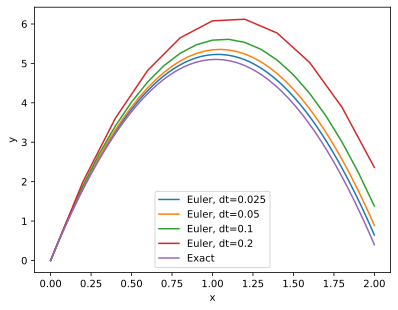

In [2]:
# Figure 1: Euler integration of a 2D particle
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import math

g = -9.8  #the gravitational constant
#the 4D state is [px,py,vx,vy]
def f_grav(x,u):
    return np.hstack((x[2:4],u + np.array([0,g])))
#you might try replacing zero_control with sin_control in g_grav and seeing what happens...
def zero_control(x,t):
    return np.zeros(2)
def sin_control(x,t):
    return np.array([5.0*math.sin(t*15),0])
def g_grav(x,t):
    u = zero_control(x,t)
    return np.hstack((x[2:4],u + np.array([0,g])))
#initial px,py,vx,vy (at origin, with forward velocity 1, upwards velocity 10)
x0 = np.array([0.0,0.0,1.0,10.0])
#integrate for total time T
T = 2.0
#compare several time steps
dts = [0.025,0.05,0.1,0.2]
for dt in dts:
    N = int(T/dt)
    times,points = integrate_euler(g_grav,x0,N,dt)
    times = np.array(times)
    points = np.array(points)
    plt.plot(points[:,0],points[:,1],label='Euler, dt='+str(dt))
times = np.linspace(0,T,50)
ground_truth = np.vstack((x0[2]*times,x0[3]*times+0.5*g*times**2)).T
plt.plot(ground_truth[:,0],ground_truth[:,1],label='Exact')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Note that the accuracy of the integration depends heavily on the timestep chosen.  In general, the smaller
the timestep, the more accurate the integration will be.  More formally, define the *integration error*
as $\epsilon(t) = x(t) - x_{\lfloor t/ \Delta t\rfloor}$. 
Higher errors result as

* The spatial variation of the dynamics function is large.  More precisely, the error will grow if the Jacobian of f (in either x or u) are large.

* The time $t$ is large (i.e., the error generally gets worse over time).

* $\Delta t$ is large.

### Higher order integrators

A great deal of work has investigated ODE integration techniques that are more accurate than Euler integration.  Rather than approximate the dynamics function as a first order Taylor expansion, they may use higher order terms to achieve lower approximation error.  A popular class of higher order methods are the **Runge-Kutta methods**, which use multiple evaluations of the dynamics function to achieve far lower error than standard Euler integration.
More advanced methods may also use **adaptive step size**, which take smaller steps where the dynamics function is found to be more highly varying. 

Many numerical libraries have a variety of integrators to choose from.  For example, the below plot shows an integrator used in Scipy library, which is, in fact, exact for this dynamics function.

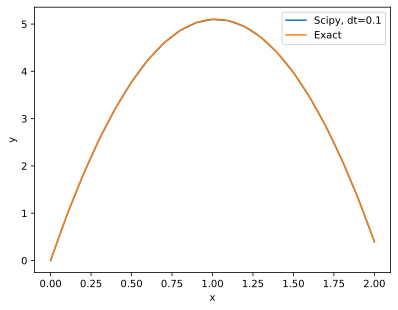

In [3]:
# Figure 2: Higher order integrators have better performance. This code demonstrates one of Scipy's ODE integrators
def integrate_scipy(f,x0,N,dt,t0=0):
    """Same arguments and return type as euler, but using the integrators in the Scipy library"""
    from scipy.integrate import ode
    r = ode(lambda t,x:f(x,t))  #need to swap the order of arguments for scipy's ode function
    r.set_integrator('dopri5')   #lots of options here... see function documentation
    r.set_initial_value(x0, t0)
    t = t0
    ts = [t0]
    xs = [x0]
    for i in range(N):
        x = r.integrate(t+dt)
        t += dt
        ts.append(t)
        xs.append(x)
    return (ts,xs)

dt = 0.1
times,points = integrate_scipy(g_grav,x0,int(T/dt),dt)
times = np.array(times)
points = np.array(points)
plt.plot(points[:,0],points[:,1],label='Scipy, dt='+str(dt))
plt.plot(ground_truth[:,0],ground_truth[:,1],label='Exact')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

### Stability, convergence, and divergence

A dynamic system is said to be:

* **Stable** for some class of initial states if its solution trajectories do not
grow without bound,

* **Unstable** (or **divergent**) if the trajectories grow without bound, and

* **Convergent** if the solution trajectories approach a single point.

A *stable point* is a state $x$ such that for some neighborhood
of $x$, the ODE is convergent toward $x$. A necessary condition for a
point to be stable is that it is an *equilibrium point*.

> **Equilibrium point**. For a continuous time dynamical system, a state $x$ such that $\dot{x} = f(x) = 0$.  For a discrete time dynamical system, a state that satisfies $x = f(x)$.

All stable points are equilibria, but the converse is not true. For example, in the system $\dot{x} = x$, $x=0$ is an equilibrium point, but it is not stable.  Through inspection, observe that $x(t) = c e^t$  is a solution to this differential equation.  Hence, a tiny perturbation $x(0) = \epsilon$ would yield the solution trajectory $x(t) = \epsilon e^t$, which grows without bound as $t$ grows.

The trajectories derived from Euler integration can be divergent even when the underlying system itself is stable or convergent.  As an example, consider the damped harmonic oscillator system $$\ddot{x} = -10x - \dot{x}$$.

With the initial condition $x(0)=1$, $\dot{x}(0)=0$, the solution trajectory is $x(t) = e^{-t/2}\cos(\omega t)$ with $\omega=\sqrt{10-1/2^2}$.  But see what happens when this is integrated using Euler's method:


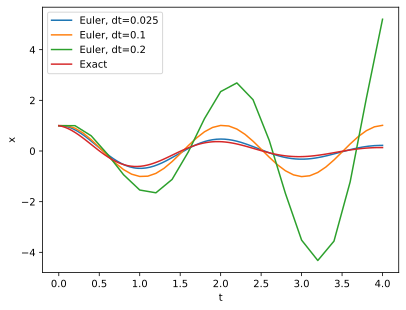

In [4]:
# Figure 3: Integration of a damped harmonic oscillator with Euler's method
def f_harmonic_oscillator(x,t):
    return np.array([x[1],-10*x[0]-x[1]])

#initial x,dx
x0 = np.array([1.0,0.0])
#integrate for total time T
T = 4.0
#compare several time steps
dts = [0.025,0.1,0.2]
for dt in dts:
    N = int(T/dt)
    times,points = integrate_euler(f_harmonic_oscillator,x0,N,dt)
    #times,points = integrate_scipy(f_harmonic_oscillator,x0,N,dt)
    times = np.array(times)
    points = np.array(points)
    #plt.plot(points[:,0],points[:,1],label='Euler, dt='+str(dt))
    plt.plot(times,points[:,0],label='Euler, dt='+str(dt))
times = np.linspace(0,T,100)
d = 0.5
w = math.sqrt(10-d**2)
ground_truth = np.vstack((np.multiply(np.exp(-d*times),np.cos(times*w)),
                          -d*np.multiply(np.exp(-d*times),w*np.sin(times*w)))).T
#plt.plot(ground_truth[:,0],ground_truth[:,1],label='Exact')
plt.plot(times,ground_truth[:,0],label='Exact')
plt.xlabel('t')
plt.ylabel('x')

plt.legend()
plt.show()

When the time step is small, the integrated trajectory does indeed converge torward 0, like the exact solution. However, at $\Delta t=0.1$, the solution is oscillatory between $[-1,1]$ and never converges.  At $\Delta t = 0.2$, the solution "blows up" toward infinity!  This is a serious problem for simulation, since we would like to avoid the computational expense of taking tiny steps, but while also integrating accurately.

In fact there are systems that are stable everywhere for which Euler's
method is unstable everywhere! An example is the oscillator:
$$\begin{bmatrix}\dot{x}  \\ \dot{y} \end{bmatrix}  = \begin{bmatrix}0 & -1 \\ 1& 0\end{bmatrix} \begin{bmatrix}x  \\ y \end{bmatrix}.$$
Here, the flow vector at a point is always perpendicular and CCW to the
vector from the origin to that point. The solution trajectories are
circles $(r \cos (t - \theta), r \sin (t - \theta))$, where $(r,\theta)$
are the polar coordinates of the initial point. If we were to
approximate this using Euler integration, each integration step brings the state
further and further from the origin, spiraling outward without bound. Taking
smaller time steps helps a little, but cannot completely remedy the problem.

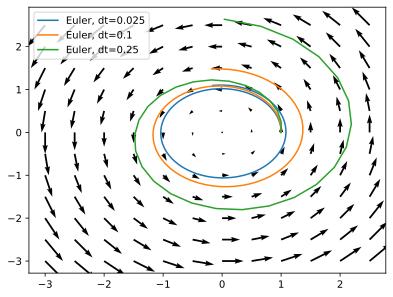

In [5]:
# Figure 4: velocity fields in the phase space of a pure oscillator demonstrate why integration can "blow up" 
def f_oscillator(x,t):
    return np.array([-x[1],x[0]])
X, Y = np.meshgrid(np.arange(-3, 3, .5), np.arange(-3, 3, .5))
UV = np.array([f_oscillator([x,y],0) for x,y in zip(X,Y)])
U = UV[:,0]
V = UV[:,1]
plt.quiver(X, Y, U, V)

#compare several time steps
T = 8.0
dts = [0.025,0.1,0.25]
x0 = np.array([1,0])
for dt in dts:
    N = int(T/dt)
    times,points = integrate_euler(f_oscillator,x0,N,dt)
    #times,points = integrate_scipy(f_harmonic_oscillator,x0,N,dt)
    times = np.array(times)
    points = np.array(points)
    plt.plot(points[:,0],points[:,1],label='Euler, dt='+str(dt))
plt.legend()
plt.show()

Simple dynamic systems 
-----------------------------------

### Particle driven by forces
A 1D particle with mass $m$, position $p$ and velocities $v$, controlled by forces $u$, follows Newton's laws under the second-order controlled dynamics:
$$\ddot{p} = u / m$$

This problem can be modeled
with a state $x = (p,v) \in \mathbb{R}^2$ and control
$u \in \mathbb{R}$ with the dynamics equation


\begin{equation}
\dot{x} \equiv \begin{bmatrix} \dot{p}\\ \dot{v} \end{bmatrix} = f(x,u) = \begin{bmatrix}v \\ u/m \end{bmatrix}. \label{eq:PointMass}
\end{equation}

This function $f$ can be thought of as a *vector
field* that maps each 2D point to a 2D vector. If we plot this vector
field on the $(p,v)$ plane for various values of $f$, we observe a few
things. First, it is invariant to $p$. Second, the value of $f$ varies
the length and direction of the vectors in the $v$ direction.

For any initial state $x_0=(p_0,v_0)$ under a constant forcing
$u(t) = c$, the velocity of the solution trajectory $x(t)$ can be
determined through simple integration:
\begin{equation}
v(t) = v_0+\int_0^t \frac{c}{m} dt = v_0 + t \frac{c}{m}.
\label{eq:PointMassVelocity}
\end{equation}

Continuing to derive the position trajectory, we see that
\begin{equation}
p(t) = p_0+\int_0^t v(t) dt = p_0+\int_0^t (v_0 + t \frac{c}{m}) dt =p_0 + t v_0 + \frac{1}{2}t^2 \frac{c}{m}.
\label{eq:PointMassPosition}
\end{equation}
This means that the velocity of the
particle increases or decreases over time according to a linear function
with slope depending on $c$, and its position takes on a parabola
trajectory over time. Note that this model generalizes to any point
particle in $n$-D space, except that position, velocity, and force
become vector quantities. The state is then a $2n$-D vector and control
is $n$-D.

Now, let us suppose we wish to drive the particle from some position to
another (say, from 0 to 1) while starting and stopping at 0 velocity.
Can we use a constant force to do so? We start with $x(0)=(0,0)$ and
wish to achieve $x(T)=(1,0)$ at some future time $T$. Well,
by (\ref{eq:PointMassPosition}) we would need $T^2 c/m = 1$, but
by (\ref{eq:PointMassVelocity}), we would need $T c / m = 0$. This is
a contradiction, so we could not reach this other state via a constant
force.

Can we use a linear interpolation instead? If we define $u=t/T$ as the
interpolation parameter, such a trajectory would have
$v(t) = 0\cdot (1-u) + 0\cdot u = 0$ and
$p(t) = 0\cdot (1-u) + 1\cdot u = t/T$. However, this trajectory does
not satisfy dynamic constraints for any value of $t>0$ and any value of
$f$!

There are a couple ways to solve this problem. One is to make $u$ a
closed-loop control, such as the PD controller
$u(x(t)) = -k_P (p-1) - k_D v$. We will show when we discuss [PID control](Control.ipynb) that for certain constants $k_P$ and $k_D$,
this choice can be shown to force the system to converge toward the
target $(1,0)$. Another is to design a clever open loop control that
satisfies the endpoint constraints and the dynamic constraints, such as
$T = 2$, $u(t) = 1$ for $t\leq 1$ and $u(t) = -1$ for $1 < t \leq 2$.
This control accelerates the system to the point $(p,v)=(0.5,1)$ at
$t=1$, and then decelerates to $(1,0)$ at $t=2$. We shall see more
general ways of designing such control functions using the optimal
control methods presented in [later chapters](OptimalControl.ipynb).

### Simulating controlled systems

For a controlled system, we could simply compose the $f$ and $u$ functions and integrate the ODE $g$, but it is often more realistic to treat the controller as a stateful component rather than a pure function.  The following implementation treats the controller  as a class with three methods `__call__(x) -> u`, `advance(x,dt)`, and `reset()`. The controller keeps track of time internally as `advance` is repeatedly called.

In [6]:
import numpy as np

class Controller:
    def __init__(self):
        self.reset()
    def __call__(self,x):
        raise NotImplementedError
    def advance(self,x,dt):
        self.t += dt
    def reset(self):
        self.t = 0

def integrate_euler_controlled(f,controller,x0,N,dt,t0=0):
    """Approximates the trajectory resulting from the initial value problem x'=f(x,u(x,t))
    using euler's method.
    
    Arguments:
    - f(x,u): a function of state and control giving the derivative dx
    - controller (Controller): a controller instance that will generate the control u.
    - x0: the initial state at time t0, x(t0)=x0
    - N: the number of steps to take
    - t0: the initial time
    
    Return value: a trajectory ([t0,t1,...,tN],[x0,x1,...,xN],[u0,u1,...,uN-1])
    """
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    us = []
    for i in range(N):
        u = controller(x)
        dx = f(x,u)
        controller.advance(x,dt)
        x = x + dt*dx
        t = t + dt
        ts.append(t)
        xs.append(x)
        us.append(u)
    return (ts,xs,us)

As an example, a PID controller will keep track of the integral of the error. Because of the integral term, it is not possible to treat $u$ as a pure function.  Applied to the example of the 2D particle under gravity, this controller tries to stabilize the particle at (0,0).  Due to the presence of the integral term, the vertical force converges toward 9.8N to counteract gravity.

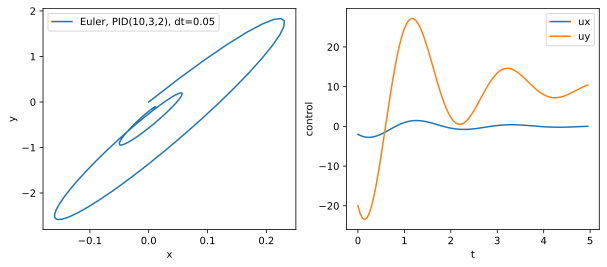

In [7]:
# Figure 5: Simulation of a 2D particle under gravity and PID control of force

class PIDController2D(Controller):
    """Assumes state is x=(qx,qy,qx',qy')"""
    def __init__(self,Kp,Ki,Kd,qdes=np.zeros(2),dqdes=np.zeros(2)):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.I = np.zeros(2)
        self.qdes = qdes
        self.dqdes = dqdes
        Controller.__init__(self)
    def __call__(self,x):
        q,dq = x[0:2],x[2:4]
        return self.Kp*(self.qdes-q)+self.Kd*(self.dqdes-dq)-self.Ki*self.I
    def advance(self,x,dt):
        q,dq = x[0:2],x[2:4]
        self.I += dt*(q-self.qdes)
        Controller.advance(self,x,dt)

#initial px,py,vx,vy (at origin, with forward velocity 1, upwards velocity 10)
x0 = np.array([0.0,0.0,1.0,10.0])
#integrate for total time T
T = 5.0
#compare several time steps
dt = 0.05
N = int(T/dt)
controller = PIDController2D(10,3,2)
times,points,controls = integrate_euler_controlled(f_grav,controller,x0,N,dt)
times = np.array(times)
points = np.array(points)
controls = np.array(controls)
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(points[:,0],points[:,1],label='Euler, PID({},{},{}), dt={}'.format(controller.Kp,controller.Ki,controller.Kd,dt))
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[1].plot(times[:-1],controls[:,0],label="ux")
axs[1].plot(times[:-1],controls[:,1],label="uy")
axs[1].set_xlabel('t')
axs[1].set_ylabel('control')
axs[1].legend()
plt.show( )

### Pendulum swing-up

The pendulum swing up problem asks to control an actuator with limited
torque to drive a pendulum with progressively larger and larger
momentum, until it can then reach and stabilize about the vertical
position. The pendulum is assumed to with a point mass at the end of a
bar of length $L$, with the other end fixed to rotate about the origin.
The system has a state space of $x=(\theta,
\omega)$, with $\theta$ the CCW angle of the mass with respect to the
$x$ axis, and $\omega$ its angular velocity. The start state is
$x=(3\pi/2,0)$ and the goal state is $x=(\pi/2,0)$.

************

![fig:PendulumStrongMotor](figures/control/pendulum_flow.svg)

<div class="figcaption"><a name="fig:PendulumStrongMotor">Figure 6.</a>
Illustrating the dynamics of a controlled pendulum moving from the
down ($\theta = 3\pi/2 \approx 4.71$) to the up
($\theta = \pi/2 \approx 1.57$) position. If the motor is strong enough,
it can proceed almost directly toward the goal state. The legend
displays torque requirement needed to implement such a controller.
</div>

************


The actuator $u$ applies a torque about the origin, and is usually
assumed bounded $|u|\leq u_{max}$. The force of gravity produces a
torque of magnitude $mg L \cos \theta$ about the origin. Since the
moment of inertia of the point mass is $mL$, the overall acceleration of
the system is: $$\ddot{\theta} = g \cos \theta + u/mL.$$ Writing this in
canonical form, we have
$$\dot{x} \equiv \begin{bmatrix}\dot{\theta}\\\ddot{\omega}\end{bmatrix} = f(x,u) = \begin{bmatrix}{\omega}\\{g \cos \theta}\end{bmatrix}  + u \begin{bmatrix}1 \\ 1/mL \end{bmatrix}.$$
This is a nonlinear equation without an analytical solution.

With $u_{max}$ sufficiently large ($u_{max} > mLg$) the motor has enough
strength to hold the pendulum steady horizontally, and it is possible to
drive it monotonically to the goal
([Fig. 1](#fig:PendulumStrongMotor)). But if the maximum torque is
lowered beyond some amount, the motor can no longer achieve sufficient
inertia to raise the pendulum without "pumping", like a child on a
swing, to increase the kinetic energy of the system. As we shall see when we discuss [bang-bang control](OptimalControl.ipynb), the optimal controller will then
alternate between extreme controls to build up enough kinetic energy to
reach the goal. This implies that the time evolution of the system will
switch between the flow fields shown in
[Fig. 2](#fig:PendulumWeakMotor).

************

|Max CW|Max CCW|
|----|----|
| ![fig:PendulumWeakMotor](figures/control/pendulum_flow_-5.svg) | ![fig:PendulumWeakMotor](figures/control/pendulum_flow_5.svg) |

<div class="figcaption"><a name="fig:PendulumWeakMotor">Figure 2.</a>
The flow fields corresponding to minimum (left) and maximum (right)
controls for a pendulum swing-up problem with unit mass, unit length,
and torque bounded at
$|u| \leq 5$ N$\cdot$m.
    </div>

************

### Cart-pole

The cart-pole problem is a toy underactuated system in which a cart that
can translate in $x$ direction needs to swing up and/or balance a pole
attached to it with a pin joint
([Fig. 3](#fig:Cartpole)). Its control has been studied quite
extensively, and it has similar dynamics to the Segway mobility
scooters.

************

![fig:Cartpole](figures/control/cartpole.svg)

<div class="figcaption"><a name="fig:Cartpole">Figure 3.</a>
    Illustration of the cart-pole problem.
</div>

************


In this problem, the system's configuration has two parameters
$q=(q_1,q_2)$ which denote the $x$ translation of the cart and the angle
of the pole, respectively. In the below convention we treat the
cart-pole as a PR robot, so that $q_2$ is the CCW angle of the pole from
the $x$ axis. In the balancing task, we wish to design a controller to
maintain the state near the unstable equilibrium point $q_2=\pi/2$ under
disturbances. In the swing-up task, we wish to go from $q_2=-\pi/2$ to
$\pi/2$. (Keep in mind that the topology of $q_2$ is SO(2), so the pole
can swing either left or right.)

This is a highly dynamic system where the cart's motors can apply forces
$u_1$ in the positive and negative $x$ direction. Optionally, the pole
could apply torques $u_2$, but it is typical to enforce $u_2=0$ so that
the pole swings passively. The cart and pole have masses $m_1$ and $m_2$
respectively, and the pole is assumed to have all of its mass
concentrated at a point distance $L$ away from the pin.

In [Chapter 14](RobotDynamics.ipynb), we shall derive the equations
of motion for the cart-pole system to be the second-order system of
equations:

$$\begin{aligned}
(m_1+m_2) \ddot{q_1} -\frac{m_2 L}{2} \ddot{q}_2  \sin q_2 - \frac{m_2 L}{2} \dot{q}_2^2  \cos q_2 = u_1 \\
-\frac{m_2 L}{2} \ddot{q}_1  \sin q_2 + \frac{m_2 L^2}{4} \ddot{q}_2 + m_2 g \cos q_2 = u_2
\end{aligned}$$

where $g$ is the gravitational constant. Notice here
that the accelerations $\ddot{q}_1$ and $\ddot{q}_2$ are coupled, in
that they appear in both equations. Solving this system of equations, we
obtain a solution:

$$\begin{bmatrix}{\ddot{q}_1}\\{\ddot{q}_2}\end{bmatrix} = 
\frac{1}{d} \begin{bmatrix}
\frac{m_2 L^2}{4} & \frac{m_2 L}{2} \sin q_2 \\
\frac{m_2 L}{2} \sin q_2 & m_1+m_2 
\end{bmatrix}
\begin{bmatrix}{u_1 + \frac{m_2 L}{2} \dot{q}_2^2 \cos q_2}\\{u_2-m_2 g \cos q_2}\end{bmatrix}$$

with $d= \frac{m_1 m_2 L^2}{4}+\frac{m_2^2 L^2}{4} \cos^2 q_2$. For any
given choice of $u_1$ and $u_2$, this can then be integrated to obtain
solution trajectories.

The cart-pole system is highly sensitive to the behavior of the cart.
[Fig. 4](#fig:CartpoleSpin) displays the behavior of the swing-up
problem under 1.5 sinusoidal movements of the cart with amplitude 0.5.
Each plot shows a slighly different period. In this setup, the pole
swings over the upright position only for periods in approximately the
range $[1.12,1.29]$. There is another range of periods where the pole is
swung about the upright position in the range $[1.32,1.39]$.


*************

|Period 1.288s | Period 1.5s |
|----|----|
| ![fig:CartpoleSpin](figures/control/cartpole_spin.svg) | ![fig:CartpoleSpin2](figures/control/cartpole_nospin.svg) |

<div class="figcaption"><a name="fig:CartpoleSpin">Figure 4</a>
    Behavior of the cart pole problem as a function of time. Slightly
changing the period of the cart's movement from 1.288 s to 1.5 s fails
to swing the pendulum past the upright position. A good swing-up
controller might use a period of 1.288 and then switch to a stabilizing
controller around
$t=2$.
    </div>

*************

### Dubins car

A Dubins car model approximates the mobility of a standard 2-axle car
moving on a flat surface, ignoring accelerations. In this model,
$(p_x,p_y)$ is the center of its rear axle, $\theta$ is its heading, and
$L$ is the distance between the front and rear axles. The control
$u=(v,\phi)$ specifies the velocity $v$ and the steering angle of the
front wheels $\phi$. The dynamics of this system are given as follows:
$$\dot{x} \equiv \begin{bmatrix}{\dot{p}_x}\\{\dot{p}_y}\\{\dot{\theta}}\end{bmatrix} = f(x,u) = \begin{bmatrix}{v \cos \theta}\\{v \sin \theta}\\{\frac{v}{L}\tan \phi}\end{bmatrix}$$
Note that the velocity vector is always parallel to the heading
$(\cos \theta,\sin \theta)$, and the turning rate $\dot{\theta}$ depends
on both the steering angle and the velocity. For constant $u$, the
position $(p_x,p_y)$ traces out straight lines (with $\phi=0$) or arcs
(with $\phi\neq 0$).

Typically, the control is subject to bounds
$v_{min} \leq v \leq v_{max}$ and $|\phi| \leq \phi_{max}$. With these
limits, the vehicle has a minimum turning radius of
$\frac{1}{L \tan \phi_{max}}$. The vehicle cannot move sideways, and
must instead perform "parallel parking" maneuvers in order to move in
the state-space direction $(-\sin \theta,\cos \theta,0)$.

Linear time invariant systems
-----------------------------


In general, the $f$ function may be nonlinear in its arguments. However,
a widely studied class of dynamical system is the *linear,
time-invariant* (LTI) system. In an LTI system, the dynamics equation
takes on the form $$\dot{x} = Ax + Bu$$ where $A$ and $B$ are constant
matrices of size $n \times n$ and $n \times m$, respectively. This type
of system is easily analyzed using results from linear algebra and can
represent a wide range of dynamic behavior.

For example, the 1D point
mass system (\ref{eq:PointMass}) can be represented as an LTI system with:
$$\dot{x} \equiv \begin{bmatrix}\dot{p} \\ \dot{v} \end{bmatrix} = \begin{bmatrix}0&1\\0&0\end{bmatrix} \begin{bmatrix}p \\ v \end{bmatrix} + \begin{bmatrix} 0 \\ 1/m \end{bmatrix}u$$

In the discrete-time
form (\ref{eq:DiscreteTimeDynamicEquation}), an LTI system takes the
form $$x_{t+1} = A x_t + B u_t.$$ A continuous-time LTI system can be
converted to an equivalent discrete-time LTI system through integration.

For example, the point mass system with time step $\Delta t$ and
constant control can be represented in discrete time as
$$\begin{aligned}
x_{t+1} &\equiv \begin{bmatrix}{p(t+\Delta t)}\\{v(t+\Delta t)}\end{bmatrix} = \begin{bmatrix}{p(t) + \Delta t v(t) + \frac{1}{2} f /m\Delta t^2}\\{v(t)+\Delta t f/m}\end{bmatrix} \\
& = \begin{bmatrix}1 & \Delta t \\ 0 & 1\end{bmatrix} x_t + \begin{bmatrix}{\frac{1}{2}\Delta t^2 / m}\\{\Delta t/m}\end{bmatrix} u_t
\end{aligned}$$

Moreover, nonlinear systems can be approximated by an LTI system about
any stable point in state space using linearization. Consider
linearizing a system of the form $\dot{x} = f(x) + g(x)u$ about state
$x_0$ and control $u_0$. Also assume that $u_0$ applied at $x_0$ leads
to no derivative (i.e., $f(x_0)+g(x_0) u_0=0$). Perform a change of
variables to $(\Delta x, \Delta u)$ such that $x = x_0 + \Delta x$ and
$u = u_0 + \Delta u$. Then $$\begin{aligned}
\dot{x} & = \dot {\Delta x} = (f(x_0)+g(x_0) u_0) + \left(\frac{\partial f}{\partial x}(x_0) + \frac{\partial g}{\partial x}(x_0)u_0\right) \Delta x + g(x_0) \Delta u \\
 & = \left(\frac{\partial f}{\partial x}(x_0) + \frac{\partial g}{\partial x}(x_0)u_0\right) \Delta x + g(x_0) \Delta u 
\end{aligned}$$ This is LTI in $(\Delta x,\Delta u)$ with
$A=\frac{\partial f}{\partial x}(x_0) + \frac{\partial g}{\partial x}(x_0)u_0$
and $B=g(x_0)$.


Noise, uncertainty, disturbances, errors
----------------------------------------

Besides handling the differential constraint of the dynamics function,
the purpose of control is to handle deviations from an idealized state
or trajectory. These deviations are in various contexts called noise,
bias, uncertainty, disturbances, or errors. When they do occur, a
variety of problems could happen: the robot could fail to reach a goal,
hit an obstacle, reach an unrecoverable state, or even run into a
person! A *robust* planner or controller is designed to produce
high-quality behavior even when such deviations exist. It is important
to recognize *errors are a fact of life* for all robots outside of
tightly controlled industrial environments.

Generally speaking, errors can be characterized as being either *noisy*
or *systematic*. A noisy error is one obeys no obvious pattern each time
it is measured. A systematic error is one that does obey a pattern. We
shall also see that for the purposes of control, these deviations fall
under two fundamental classes, which we call *motion uncertainty* and
*state uncertainty*.

*Disturbances* are a form of motion uncertainty that cause the state to
be moved in unexpected ways at future points in time. For example, wind
gusts are very hard to predict in advance, and can move a drone from a
desired path.

*Actuation error* occurs when a desired control is not executed
faithfully. An example would be a controller that outputs desired
torques for a robot, but where these are not followed exactly by the
low-level motor controller. These errors can be treated as motion
uncertainty.

*Measurement error* is a type of state uncertainty where due to sensor
noise the state is observed incorrectly. Understanding measurement error
is critical for closed-loop controllers which base their behavior on the
measured state.

*Partial observability* means that only certain aspects of the state
*can possibly be measured* by the available sensors. For example, a
mobile robot with a GPS sensor can only measure position, whereas it may
need to model velocity as part of its state. State estimation techniques,
such as Kalman filtering and particle filtering,
can be used to extrapolate the unobserved components of state to provide
reasonable state estimates. With those estimates, there will be some
remaining *localization error* that the controller will still need to
handle.

*Modeling error*, or *parameter uncertainty* means that the true
dynamics function differs from what is *known* to the robot. This is
sometimes considered a third class of uncertainty, but could also be
treated as state uncertainty as we shall see below.

Motion uncertainty can be modeled as a disturbance to the dynamics
$$\dot{x} = f(x,u) + \epsilon_d$$ where $\epsilon_d(t) \in E_d$ is some
error. Here $E_d$ is a set of possible disturbances, or a probability
distribution over disturbances. Motion uncertainty will cause an
open-loop system to "drift" from its intended trajectory over time. A
properly designed closed-loop controller can regulate the disturbances
by choosing controls that drive the system back to intended trajectory.

State uncertainty can be modeled as a discrepancy between the estimated
state $\hat{x}$ and the "true" state of the system $x$, such that
$\hat{x} = x + \epsilon_x$. This means that in open-loop trajectory
planning, we will start a plan from the estimated state $\hat{x}$. Then,
even if there was no motion uncertainty and we planned the best control
sequence possible $u(t)$ starting from $\hat{x}$, bad things could still
happen when it is executed. For closed-loop control, the control policy
$u(\hat{x})$ is *always chosen based on an incorrect estimate*. This
makes it much more difficult to ensure that it is correcting for true
deviations from the intended trajectory, rather than phantom errors
caused by uncertainty.

To design a robust controller, we might try to characterize $E_d$ and
$E_x$ by observing likely disturbance values. If we observe systematic
errors like a constant *bias*, then perhaps we can improve our models to
be more accurate and cancel out the systematic error (called
*calibration*). On the other hand, noisy errors are much harder to
cancel out. To make any theoretical guarantees about a system's behavior
in the case of motion uncertainty, it is usually necessary to ensure
that noise in $E_x$ and $E_d$ are relatively small.

Finally, let us note that modeling error can often be treated as state
uncertainty on a different dynamical system on an *augmented state*
vector. Suppose that we are controlling a 1D point mass, but we do not
observe the true mass $m$. Instead, we observe $\hat{m}$ which is
disturbed from the true value by $\epsilon_m$ such that
$\hat{m} = m + \epsilon_m$. If we construct the augmented state vector
$(p,v,m)\in \mathbb{R}^3$, then the state follows dynamics
$$\dot{x} \equiv \begin{bmatrix}\dot{p} \\ \dot{v} \\ \dot{m} \end{bmatrix} = f(x,u) = \begin{bmatrix} v \\ f/m \\ 0 \end{bmatrix}.$$
Hence, the modeling error is equivalent to the state uncertainty vector
$$\epsilon_x = \begin{bmatrix} 0 \\ 0 \\ \hat{m}-m \end{bmatrix}.$$

Trajectories with timing
-------------------------------------

It is important to discuss the difference between trajectories of a
dynamic system vs. the geometric paths that we worked with in kinematic
motion planning. In a dynamic system, the trajectory in state space
$x(t):[0,T]\rightarrow \mathbb{R}^n$ is parameterized by time. The state
space of a robotic system typically includes both configuration and
velocity components. By contrast, a geometric path moves in
configuration space and has no inherent notion of time.

Moreover, a geometric path can move in any direction as long as it does
not touch an obstacle, whereas a valid dynamic trajectory can only move
in directions that can be generated by feasible controls. Hence we must
consider both time and dynamic constraints when representing valid
trajectories.

### Trajectory representation

One basic representation is to store a trajectory as a sequence of
states sampled along the trajectory $(x_0,\ldots,x_n)$ along with the
initial time $t_0$ (often assumed to be 0) and the time step $\Delta t$
between each point. An approximate interpolation between each point can
be performed piecewise-linearly or with splines. For example, the
piecewise linear approximation has
$$x(t) = x_k + \frac{t-t_0-k\Delta t}{\Delta t}(x_{k+1} - x_k)$$ defined
over $t \in [t_0,t_0+n\Delta t]$, where
$k = \lfloor \frac{t-t_0}{\Delta t} \rfloor$ is the index of the
trajectory segment corresponding to the time $t$.

More generally, the
trajectory could store both states $(x_0,\ldots,x_n)$ and times
$(t_0,\ldots,t_n)$, with a slightly modified interpolation function
$$x(t) = x_k + \frac{t-t_k}{t_{k+1}-t_k}(x_{k+1} - x_k)$$ defined over
the range $[t_0,t_n]$ and $k$ determined to be the point in time so that
$t_k \leq t \leq t_{k+1}$.

If we are given an *integrator* (i.e., a *simulator*) for the dynamics
function, trajectories can be encoded in a control-space representation
$(x_0,u)$, which captures the initial state $x_0$ and an arbitrary control trajectory $u(t)$.
From these items, the integrator *generates* the state trajectory
$x(t)$. Specifically, we assume the existence of a function
$Sim(f,x_0,u,t)$ that integrates the dynamics $f$ forward over time $t$,
starting from $x_0$ and using the control trajectory $u$. The control
$u$ can be stored using arbitrary path representations, like
piecewise-constant functions, piecewise-linear functions, polynomials,
and splines. Then, we can regenerate the state-space trajectory
$x(t) \equiv Sim(f,x_0,u,t)$ as needed.

### Path to trajectory conversion

It is almost trivial to convert trajectories to paths: simply 
construct a state space path and dropping the time component.
The converse --- creating a timed, dynamically-feasible trajectory from
a path --- can in some cases be quite challenging or even impossible. The reason is that the speed at which a robot should execute a path requires foresight into future twists and turns, like a race car driver slowing down ahead of a hairpin turn. 

If a piecewise linear path were to be executed at a constant rate, then the timed trajectory would instantaneously change velocity at each milestone.  But infinite forces are needed to execute instantaneous changes of velocity, so sending such trajectories to motors would lead to overshooting corners.  We will examine
better methods for industrial robots to start and stop smoothly at milestones
when we discuss [motion generation](RobotControl.ipynb#Motion-queues-(motion-generation)).  The basic idea is to speed up and slow down gradually, while choosing the point in time when the robot slows so that the robot ends exactly at the next milestone.

The more general case is known as a *time-scaling* problem. Mathematically, we describe such a problem as being given a geometric path $p(s)$ as input, and we wish to find a timed path $x(t)$ such that:

* The trajectory follows the path: for all $t$, there exists an $s$ such that $x(t) = p(s)$
* First-order dynamic constraints satisfied: $g(t,\dot{x}(t)) \leq 0$ for all $t$
* Second-order dynamic constraints satisfied: $h(t,\dot{x}(t),\ddot{x}(t)) \leq 0$ for all $t$
* Possibly higher-order constraints as well...

This is formulated as finding a smooth, monotonically increasing 1D function $t(s)$ that defines the timing along the path.  At one end of the domain, there is a boundary constraint $t(0)=0$.  Since $t(s)$ is monotonically increasing, it has a well-defined inverse $s(t)$, so that the trajectory is defined via $x(t) = p(s(t))$.  and we can define the trajectory velocity, acceleration, and higher order derivatives using the chain rule:

* $\dot{x}(t) = p^\prime(s(t)) s^\prime(t)$ 
* $\ddot{x}(t) = p^{\prime\prime}(s(t)) s^\prime(t)^2 + p^\prime(s(t)) s^{\prime\prime}(t)$ 
* ...

Then, a dynamic constraint of order $k$ can then be rewritten in terms of $p$ (which is known), $s$, and their derivatives up to order $k$. Choosing $s(t)$ then becomes a constrained trajectory optimization problem, which we will discuss when we visit the topic of [optimal control](OptimalControl.ipynb).


Summary
-------

* Continuous-time dynamic systems are represented by a dynamics equation in the canonical form $\dot{x}(t) = f(x(t),u(t))$, where $x$ is the state trajectory and $u$ is the control trajectory.  Discrete-time systems are represented by the form $x_{t+1} = f(x_t,u_t)$.
* Integration (or simulation) is needed to determine the trajectory that the state will follow under a given control.  Numerical instability can result with a time step that is too large.
* Dynamic systems can be convergent, stable, or divergent under a given controller.

Exercises
---------